# Import modules

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, export_graphviz

import os
import graphviz
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

# Create the toy dataset

In [2]:
data_dict = {
    "drug_dosage" : np.arange(1, 40 + 1),
    "drug_effectiveness" : np.concatenate([
        stats.uniform(loc = 0,  scale = 0.5).rvs(size = 10), 
        stats.norm(loc = 10,  scale = 1).rvs(size = 5),
        stats.uniform(loc = 100, scale = 1).rvs(size = 10), 
        stats.norm(loc = 40, scale = 1).rvs(size = 5),
        stats.uniform(loc = 0,  scale = 0.5).rvs(size = 10)
    ])} 

<AxesSubplot:xlabel='drug_dosage', ylabel='drug_effectiveness'>

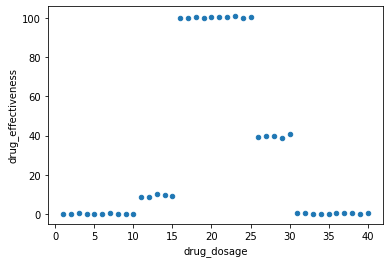

In [3]:
df = pd.DataFrame(data_dict)
df.plot.scatter(x = "drug_dosage", y = "drug_effectiveness")

df.plot()

# Build regression decision tree

In [4]:
decision_tree_regressor = DecisionTreeRegressor(max_depth = 2)
decision_tree_regressor.fit(df.drop("drug_effectiveness", axis = 1, inplace=False), df["drug_effectiveness"])

DecisionTreeRegressor(max_depth=2)

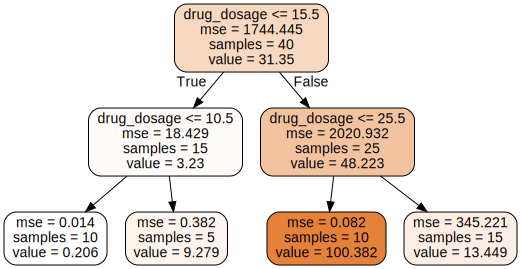

In [5]:
dot_data = export_graphviz(decision_tree_regressor, out_file=None, filled=True, rounded = True, feature_names=["drug_dosage"], class_names=["drug_effectiveness"])
graph = graphviz.Source(dot_data)
graph